In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("teledata.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [18]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")

In [19]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [21]:
df.isnull().sum().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df.duplicated().sum()

0

### converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [24]:
def conv(value):
    if(value == 1):
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


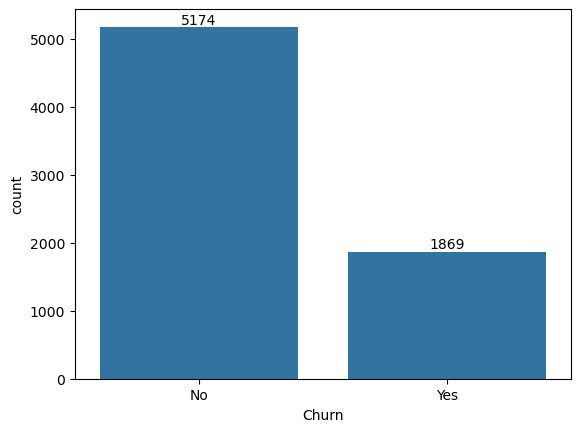

In [29]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.show()

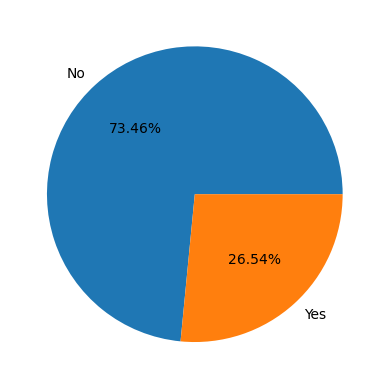

,Churn
Churn,
No,5174
Yes,1869


In [35]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.show()
gb

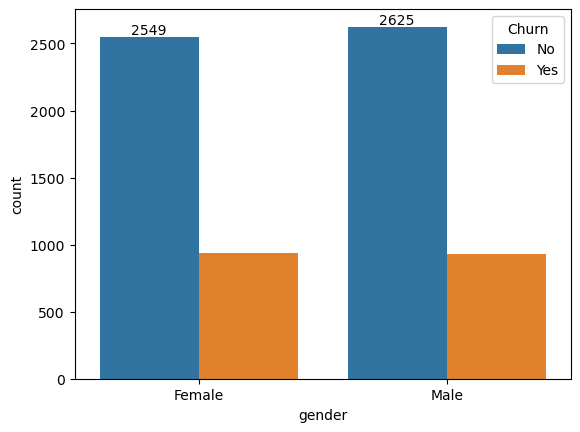

In [40]:
gn = sns.countplot(x = "gender", data=df, hue="Churn")
gn.bar_label(gn.containers[0])
plt.show()

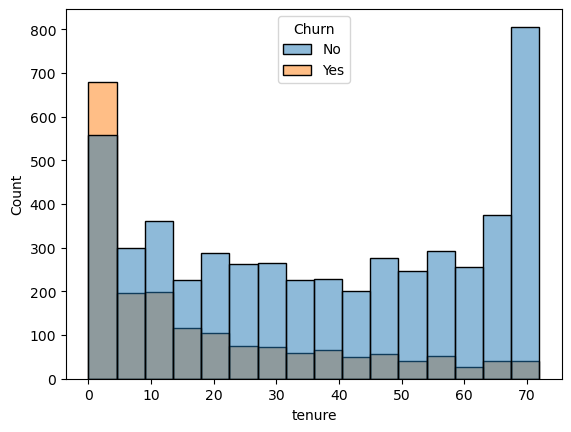

In [42]:
sns.histplot(x='tenure', data=df, hue='Churn')
plt.show()

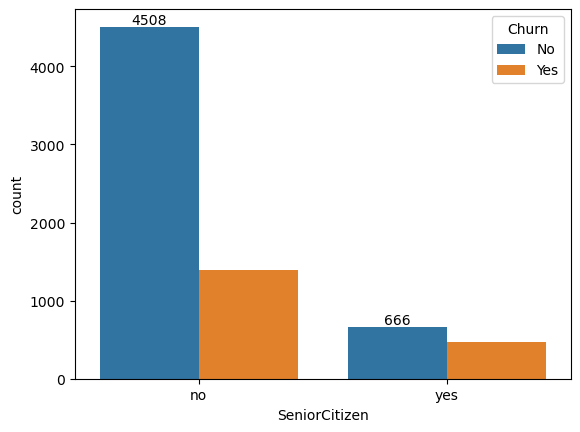

In [45]:
sin = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
sin.bar_label(sin.containers[0])
plt.show()

In [47]:
column = df.columns.values

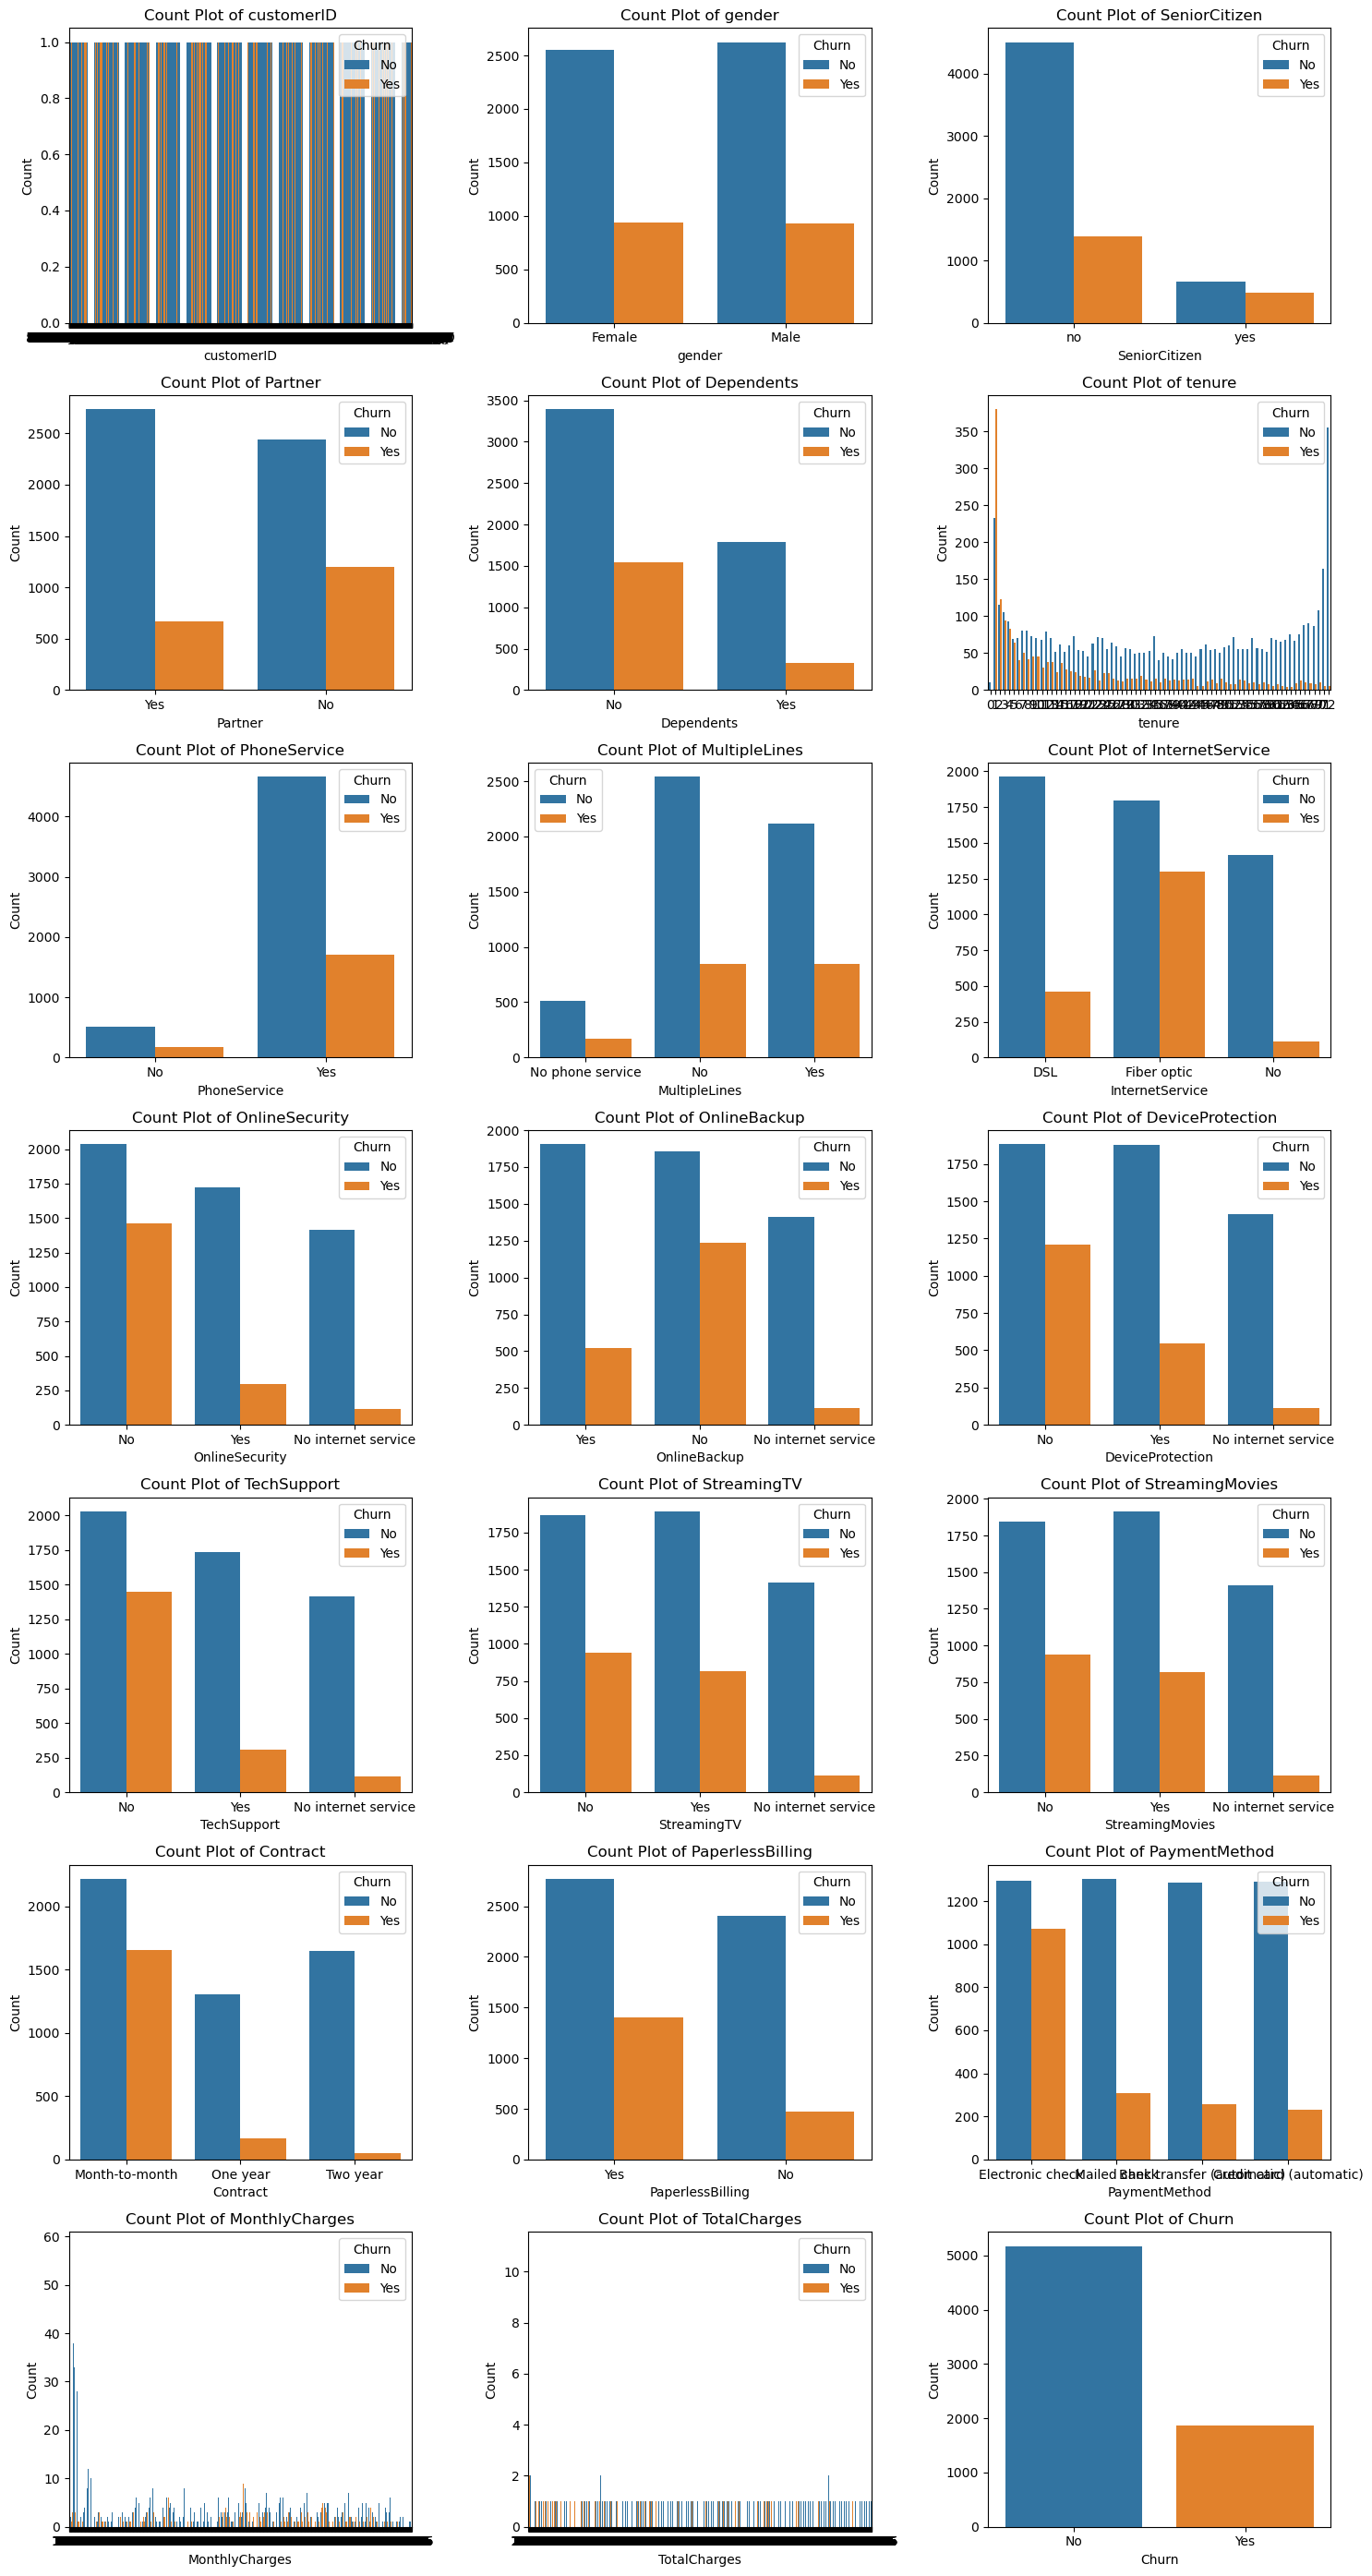

In [52]:
n_cols = 3
n_rows = (len(column) + n_cols - 1 ) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize =(15, n_rows*4))

axes = axes.flatten()

for i, col in enumerate(column):
    sns.countplot(x = col, data=df, ax = axes[i], hue=df['Churn'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()